In [1]:
import sys
sys.path.append('../src/')

import decode_mcd
import decode_mcd.multi_objective_problem as MOP
from decode_mcd import data_package
from decode_mcd import design_targets
from decode_mcd import counterfactuals_generator

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [6]:
x = np.random.random((100,2))
x = pd.DataFrame(x, columns=['x1', 'x2'])
def evaluate_objective(_x):
    _x = _x.values
    r1 = _x[:,0]
    r2 = _x[:,1]
    r3 = -(r1**2 + r2**2)
    r4 = -(r1+r2)
    r_all = np.array([r1, r2, r3, r4]).T
    r_all = pd.DataFrame(r_all, columns=['r1', 'r2', 'r3', 'r4'])
    return r_all
def check_constraint(_x):
    _x = _x.values
    r1 = _x[:,[0]]
    r2 = _x[:,[1]]
    r3 = np.minimum(r1, r2)-0.5
    return r3
y = evaluate_objective(x)
c = check_constraint(x)
valid_idx = c>=0
x = x[valid_idx]
y = y[valid_idx]

In [7]:
import random

from pymoo.core.variable import Real

data = data_package.DataPackage(features_dataset=x,
                           predictions_dataset=y,
                           query_x=x.iloc[0:1],
                           design_targets=design_targets.DesignTargets([design_targets.ContinuousTarget(label="r1", lower_bound=0.1,upper_bound=0.5),
                                                                        design_targets.ContinuousTarget(label="r2", lower_bound=-np.inf,upper_bound=0.5),
                                                                        design_targets.ContinuousTarget(label="r3", lower_bound=-1.0,upper_bound=np.inf),
                                                                        design_targets.ContinuousTarget(label="r4", lower_bound=-1.0,upper_bound=np.inf)]),
                           datatypes=[Real(bounds=(0, 1)), Real(bounds=(0, 1))])

problem = MOP.MultiObjectiveProblem(data_package=data,
                                prediction_function = evaluate_objective,
                                constraint_functions=[])

generator = counterfactuals_generator.CounterfactualsGenerator(problem=problem,
                                     pop_size=100,
                                     initialize_from_dataset=False)

generator.generate(n_generations=100)
counterfactuals = generator.sample_with_dtai(num_samples=100, gower_weight=1,
                                             avg_gower_weight=1, cfc_weight=1,
                                             diversity_weight=50, include_dataset=False)
print(counterfactuals)

Initial population randomly initialized!
Training GA from 0 to 100 generations!
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       99 |      1 |  0.000000E+00 |  0.5512487895 |             - |             -
     2 |      199 |      1 |  0.000000E+00 |  0.1353776155 |  0.1518005992 |         ideal
     3 |      299 |      1 |  0.000000E+00 |  0.0186277774 |  0.000000E+00 |             f
     4 |      399 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     5 |      499 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |      599 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     7 |      699 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      799 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0001764047 |             f
     9 |      899 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0001764047 |             f
    10 |  

In [8]:
counterfactuals

,x1,x2
0,0.497837,0.453233
1,0.487686,0.491702
2,0.494983,0.481779
3,0.442339,0.180852
4,0.475070,0.479881
...,...,...
95,0.474107,0.482451
96,0.492512,0.472660
97,0.333349,0.481842
98,0.470321,0.407486


,x1,x2
0,0.497837,0.453233
1,0.487686,0.491702
2,0.494983,0.481779
3,0.442339,0.180852
4,0.475070,0.479881
...,...,...
95,0.474107,0.482451
96,0.492512,0.472660
97,0.333349,0.481842
98,0.470321,0.407486


,r1,r2,r3,r4
0,0.497837,0.453233,-0.453262,-0.951070
1,0.487686,0.491702,-0.479609,-0.979388
2,0.494983,0.481779,-0.477119,-0.976762
3,0.442339,0.180852,-0.228371,-0.623191
4,0.475070,0.479881,-0.455977,-0.954951
...,...,...,...,...
96,0.492512,0.472660,-0.465975,-0.965171
97,0.333349,0.481842,-0.343293,-0.815191
98,0.470321,0.407486,-0.387247,-0.877807
99,0.499683,0.421991,-0.427760,-0.921675


c:\Users\Lyle\mambaforge\envs\mcd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lyle\mambaforge\envs\mcd\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lyle\mambaforge\envs\mcd\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lyle\mambaforge\envs\mcd\Lib\site-packages\seaborn\_oldcore.py:1075: Fut

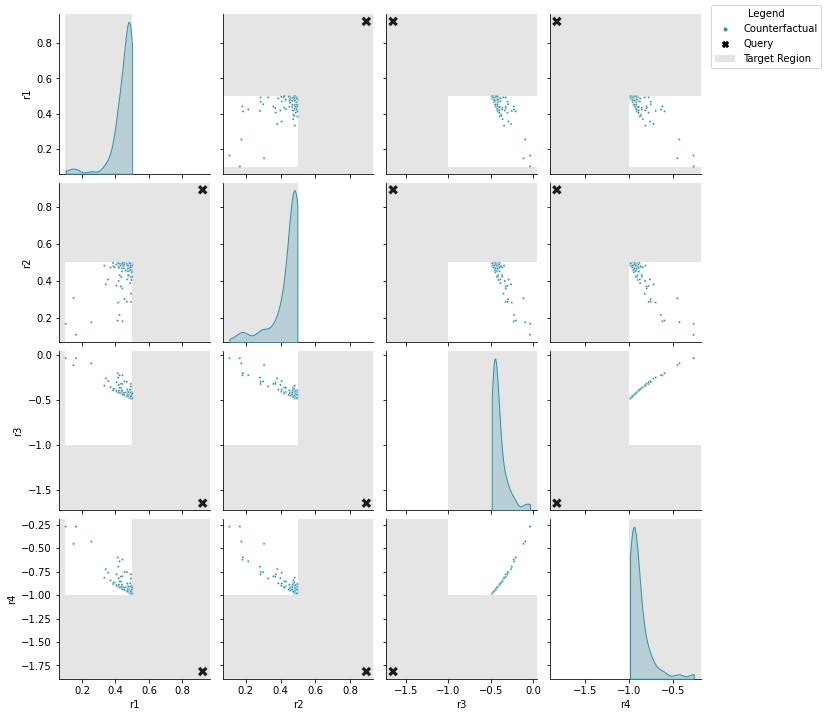

In [80]:
import seaborn as sns
import matplotlib.patches as patches
from matplotlib.path import Path
def plot_cfs(counterfactuals, generator):
    display(counterfactuals)
    query = generator._problem._data_package.query_x
    query.index = ['query']
    #append query x to top of counterfactuals
    counterfactuals_and_query = pd.concat([counterfactuals, query], axis=0)
    obj_scores = generator._problem._get_predictions(counterfactuals_and_query, False)
    #replace with get_predictions
    display(obj_scores)
    column_names = generator._problem._data_package.predictions_dataset.columns
    obj_scores = pd.DataFrame(obj_scores, columns=column_names)
    scores = []
    minimums = []
    maximums = []
    for i, target in enumerate(generator._problem._data_package.design_targets.continuous_targets):
        name = target.label
        score = obj_scores[name]
        scores.append(score)
        minimums.append(target.lower_bound)
        maximums.append(target.upper_bound)
    scores = pd.concat(scores, axis=1)
    # print(scores)
    num = len(scores.columns)
    #add column to distinguish query
    classes = ["Counterfactual"]*len(counterfactuals) + ["Query"]
    scores['class'] = classes
    #seaborn pairplot of validity
    palette=["#3291a8", "#000000"]
    markers=[".", "X"]
    s = [20]*100 + [100]
    grid = sns.pairplot(scores, hue = "class", kind="scatter", diag_kind="kde", palette=palette, markers=markers, plot_kws={"s": s}, diag_kws={"cut":0})
    proxy = [patches.Patch(color='gray', alpha=0.5, label='Shaded Region')]

    #add shaded region to plot
    for i, ax in enumerate(grid.axes.ravel()):
        x_idx = i%num
        y_idx = i//num
        minx_i = max(minimums[x_idx], ax.get_xlim()[0])
        maxx_i = min(maximums[x_idx], ax.get_xlim()[1])
        miny_i = max(minimums[y_idx], ax.get_ylim()[0])
        maxy_i = min(maximums[y_idx], ax.get_ylim()[1])
        minx_o = ax.get_xlim()[0]
        maxx_o = ax.get_xlim()[1]
        miny_o = ax.get_ylim()[0]
        maxy_o = ax.get_ylim()[1]

        if x_idx!=y_idx:            
            vertices = [
                (minx_o, miny_o),  # Botton left of outer rect
                (minx_o, maxy_o),  # Top left
                (maxx_o, maxy_o),  # Top right
                (maxx_o, miny_o),  # Bottom right
                (minx_o, miny_o),  # Bottom left again to close the path
                (minx_i, miny_i),  # Botton left of inner rect
                (maxx_i, miny_i),  # Bottom right
                (maxx_i, maxy_i),  # Top right
                (minx_i, maxy_i),  # Top left
                (minx_i, miny_i),  # Bottom left again to close the path
            ]

            codes = [
                Path.MOVETO,  # Start path
                Path.LINETO,  # Line to top-left of outer rectangle
                Path.LINETO,  # Line to top-right
                Path.LINETO,  # Line to bottom-right
                Path.CLOSEPOLY,  # Close the outer rectangle
                Path.MOVETO,  # Start path for the inner rectangle
                Path.LINETO,  # Line to bottom-right of inner rectangle
                Path.LINETO,  # Line to top-right
                Path.LINETO,  # Line to top-left
                Path.CLOSEPOLY,  # Close the inner rectangle (creates the cut-out effect)
            ]

            # Combine vertices and codes into a path object
            path = Path(vertices, codes)

            # Create a patch based on the path object
            patch = patches.PathPatch(path, facecolor='gray', lw=0, alpha=0.2)
            ax.add_patch(patch)
            pass
        else:
            rect = patches.Rectangle((minx_i, miny_o),maxx_i-minx_i,maxy_o-miny_o,linewidth=0,edgecolor='black',facecolor='gray', alpha=0.2)
            ax.add_patch(rect)
            pass

    #add shaded region to legend
    legend = grid.fig.legends[0]  # Get the first (and typically only) legend
    handles, labels = legend.legendHandles, [text.get_text() for text in legend.texts]
    handles.append(patch)
    labels.append('Target Region')
    
    # Remove the existing legend
    for legend in grid.fig.legends:
        legend.remove()
    #Create replacement
    grid.fig.legend(handles, labels, loc='upper right', title='Legend')
        
    plt.show()
    
plot_cfs(counterfactuals, generator)